<a href="https://colab.research.google.com/github/Aman78695/Ted-Talk-View-Prediction-Regression-/blob/main/Copy_of_Md_Amanatullah_Capstone_Project_Regression_Ted_Talk_View_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About this Project

This is a Machine Learning Capstone Project in which we have to predict the Ted Talk View based on their history performance.

The Project is done by Md Amanatullah.
```



## Problem Statement
TED is devoted to spreading powerful ideas on just about any topic. This dataset contain over 4,005 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

TED talks have been given for many years with the platform of "Ideas Worth Spreading". In the digital world we live in today, TED is a great platform to get your idea out there. But how do you know if your idea will be heard or appreciated.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

# The Structure of this notebook

Importing Libraries

Loading the Dataset

Data Exploration

Data Cleaning

EDA on features

Identifying the dependent and inpependent variable

Feature Engineering

Feature selection

Fitting the regression models and HyperParameter Tuning

Comparison of Models

Final selection of the model

Conclusion



In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#converting the csv file into dataframe and storing into variable df
df=pd.read_csv('/content/data_ted_talks (1).csv')
df

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society

## Explotary Data Analysis

In [4]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

**'talk_id'**=Special unique id given to each talk.

**'title'**=Title of the talk.

**'speaker_1'**=Main speaker of the talk.

**'all_speakers'**=Other speakers alongwith main speaker

**'occupations'**=Occupation of the speaker.

**'about_speakers'**=Some acchievements of speaker.

**'views'**=Total no. of views recorded.

**'native_lang'**=The original language in which talk was recorded.

'available_lang'=The other languages in which the talk is         available.


In [5]:
df.shape
#the df has total of 4005 rows and 19 columns

(4005, 19)

In [ ]:
df

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society

In [6]:
#describing the numeric features wiyh their mean,median,mode,maximium value,minimum value and different quartiles
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [ ]:
#ted talks in which the views are zero
df.loc[df['views']==0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2813,17850,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},{0: 'Dr. Enric Sala is a former university pro...,0,2018-04-26,2018-06-06,TED en Español en NYC,es,"['en', 'es']",NaN,772,"['environment', 'economics', 'biosphere', 'nat...","{17733: ""Let's turn the high seas into the wor...",https://www.ted.com/talks/enric_sala_por_que_n...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...
3056,29009,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},"{0: 'Alejandro Chaskielberg is a photographer,...",0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"['en', 'es', 'pt']",NaN,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,https://www.ted.com/talks/alejandro_chaskielbe...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw..."
3068,29688,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnica agropecuaria y agroalimentaria']},{0: 'Rena es Técnica Agropecuaria y Agroalimen...,0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,"['en', 'es', 'nl']",NaN,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...",https://www.ted.com/talks/renata_di_tullio_por...,"Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...
3520,43755,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},"{0: ['biologist', 'medical entomologist']}",{0: 'Professor James Logan leads an internatio...,0,2019-05-18,2019-06-11,TEDxLondon,en,"['en', 'pt-br', 'ru', 'zh-tw']",NaN,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,https://www.ted.com/talks/james_logan_can_dogs...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...
3790,55342,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},{0: ['productor audiovisual']},"{0: 'Diego viene del mundo de la producción, l...",0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,"['en', 'es', 'it']",NaN,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: ""A to...",https://www.ted.com/talks/diego_prilusky_como_...,"Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [ ]:
"""Looking at the description of numeric features we can conclude that
1.comments have some nullvalues.
2.duration values are more spread as it has high value of standard deviation from the mean.
3.we can also see the minimum and maximum values of each column and the percentile"""

'Looking at the description of numeric features we can conclude that\n1.comments have some nullvalues.\n2.duration values are more spread as it has high value of standard deviation from the mean.\n3.we can also see the minimum and maximum values of each column and the percentile'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
#checking null values
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [7]:
#name of the columns in dataframe
column_list=list(df.columns)
column_list

['talk_id',
 'title',
 'speaker_1',
 'all_speakers',
 'occupations',
 'about_speakers',
 'views',
 'recorded_date',
 'published_date',
 'event',
 'native_lang',
 'available_lang',
 'comments',
 'duration',
 'topics',
 'related_talks',
 'url',
 'description',
 'transcript']

In [ ]:
df.describe(include='object')

,title,speaker_1,all_speakers,occupations,about_speakers,recorded_date,published_date,event,native_lang,available_lang,topics,related_talks,url,description,transcript
count,4005,4005,4001,3483,3502,4004,4005,4005,4005,4005,4005,4005,4005,4005,4005
unique,4005,3274,3306,2049,2977,1334,2962,459,12,3902,3977,4005,4005,4005,4005
top,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,2017-04-24,2017-09-07,TED-Ed,en,['en'],"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,1,34,34,53,10,97,27,556,3957,24,8,1,1,1,1


In [ ]:
#name of the column with numeric values
numeric_features=list(df.describe().columns)
numeric_features

['talk_id', 'views', 'comments', 'duration']

## Data Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


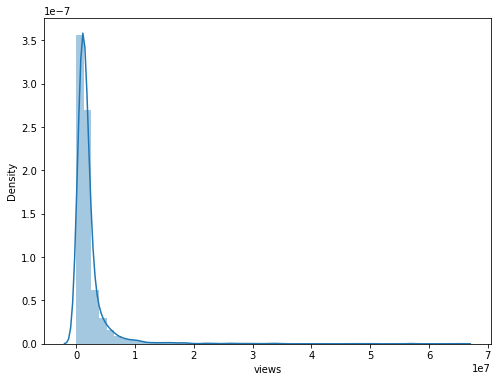

In [8]:
plt.figure(figsize=(8,6))
sns.distplot(df['views'])
#the distribution is positively skewed 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


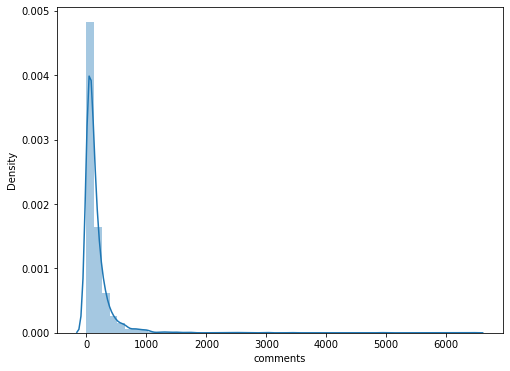

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(df['comments'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


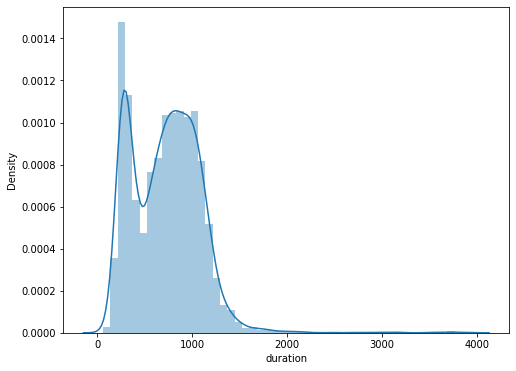

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(df['duration'])

### Lets Find the Correlation between the dataset

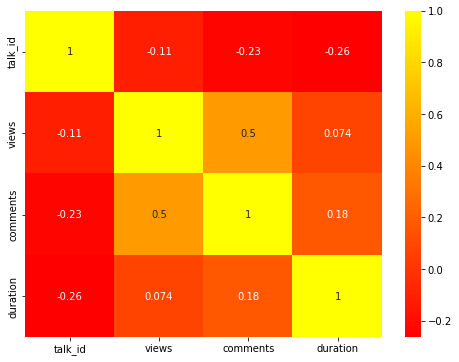

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap= "autumn")

Looking at the heatmap of numerical features we can infer that the numerical features have no strong correlation between them.

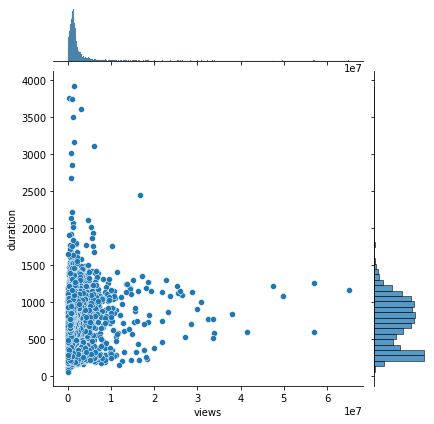

In [ ]:
sns.jointplot(x='views',y='duration',data=df)

From the above relation between duration and views we can conclude that the lower duration talk has more views





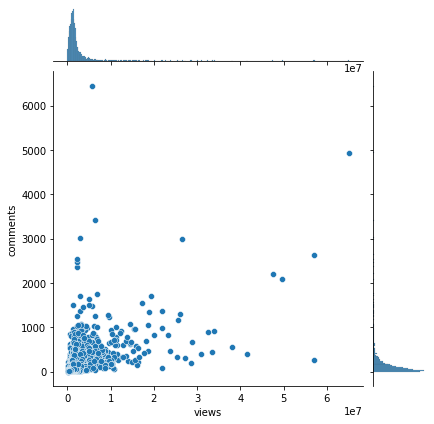

In [ ]:
sns.jointplot(x='views',y='comments',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

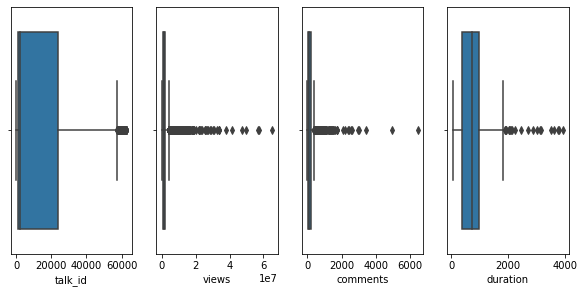

In [ ]:
numeric_features=list(df.describe().columns)
i=1
fig,ax=plt.subplots(1,3,figsize=(10,10))
for column in numeric_features:
 plt.subplot(2,4,i)
 sns.boxplot(df[column])
 i=i+1

#Looking at the top speakers which have got the most views descending order

In [12]:
top_views_speaker1 = df.sort_values(by='views',ascending=False)
top_views_speaker1

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
1296,1569,Your body language may shape who you are,Amy Cuddy,{0: 'Amy Cuddy'},{0: ['social psychologist']},{0: 'Amy Cuddy’s research on body language rev...,57074270,2012-06-26,2012-10-01,TEDGlobal 2012,en,"['ar', 'az', 'bg', 'ca', 'cs', 'da', 'de', 'el...",2633.0,1262,"['body language', 'brain', 'business', 'psycho...","{1042: 'The power of vulnerability', 26915: 'H...",https://www.ted.com/talks/amy_cuddy_your_body_...,(NOTE: Some of the findings presented in this ...,So I want to start by offering you a free no-t...
2062,2405,This is what happens when you reply to spam email,James Veitch,{0: 'James Veitch'},{0: ['comedian and writer']},"{0: 'For James Veitch, a British writer and co...",56932551,2015-12-08,2016-01-08,TEDGlobal>Geneva,en,"['ar', 'be', 'bg', 'ca', 'cs', 'da', 'de', 'el...",257.0,588,"['comedy', 'curiosity', 'communication', 'humo...","{2236: 'Why we laugh', 26: 'If I controlled th...",https://www.ted.com/talks/james_veitch_this_is...,"Suspicious emails: unclaimed insurance bonds, ...","A few years ago, I got one of those spam email..."
646,848,How great leaders inspire action,Simon Sinek,{0: 'Simon Sinek'},{0: ['leadership expert']},{0: 'Simon Sinek explores how leaders can insp...,49730580,2009-09-17,2010-05-04,TEDxPuget Sound,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'da', 'de', 'el...",2079.0,1084,"['TEDx', 'business', 'entrepreneur', 'leadersh...","{1998: 'Why good leaders make you feel safe', ...",https://www.ted.com/talks/simon_sinek_how_grea...,Simon Sinek has a simple but powerful model fo...,How do you explain when things don't go as we ...
796,1042,The power of vulnerability,Brené Brown,{0: 'Brené Brown'},{0: ['vulnerability researcher']},"{0: 'Brené Brown studies vulnerability, courag...",47544833,2010-06-06,2010-12-23,TEDxHouston,en,"['ar', 'be', 'bg', 'ca', 'cs', 'da', 'de', 'el...",2209.0,1219,"['TEDx', 'communication', 'culture', 'depressi...","{1391: 'Listening to shame', 1053: 'Gaming to ...",https://www.ted.com/talks/brene_brown_the_powe...,Brené Brown studies human connection -- our ab...,"So, I'll start with this: a couple years ago, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,17850,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},{0: 'Dr. Enric Sala is a former university pro...,0,2018-04-26,2018-06-06,TED en Español en NYC,es,"['en', 'es']",NaN,772,"['environment', 'economics', 'biosphere', 'nat...","{17733: ""Let's turn the high seas into the wor...",https://www.ted.com/talks/enric_sala_por_que_n...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...
3056,29009,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},"{0: 'Alejandro Chaskielberg is a photographer,...",0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"['en', 'es', 'pt']",NaN,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,https://www.ted.com/talks/alejandro_chaskielbe...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw..."
3068,29688,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnic

In [ ]:
top_views_speaker1 = df.sort_values(by='views',ascending=False)
top_views_speaker=top_views_speaker1.iloc[:,2:7:4]
top_views_speaker


,speaker_1,views
4,Sir Ken Robinson,65051954
1296,Amy Cuddy,57074270
2062,James Veitch,56932551
646,Simon Sinek,49730580
796,Brené Brown,47544833
...,...,...
2813,Enric Sala,0
3056,Alejandro Chaskielberg,0
3068,Renata di Tullio,0
3520,James Logan,0


Let us visualise the above data in the form of bar graph to visualize it in better way.

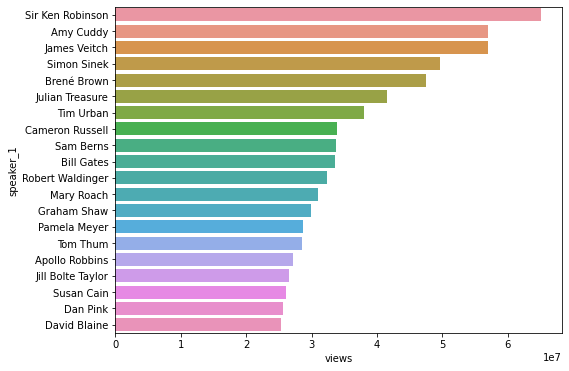

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='views',y='speaker_1',data=top_views_speaker.head(20))

#Looking at the various occupations of the speakers

In [ ]:
x=pd.DataFrame(df['occupations'].value_counts())
counts_occup_speaker=x.rename(columns={'occupations':'counts'})
counts_occup_speaker

,counts
{0: ['writer']},53
{0: ['journalist']},47
{0: ['entrepreneur']},42
{0: ['artist']},41
{0: ['architect']},38
...,...
"{0: ['director', 'designer']}",1
{0: ['life saver']},1
"{0: ['author', 'researcher', 'podcaster']}",1
{0: ['advertising expert']},1


From the above data we can infer that most of the speakers are writer

#Let us visualise the topmost views occupationwise of the speaker

In [ ]:
top_views_occupation1=df.sort_values(by='views',ascending=False)
top_views_occupation=top_views_occupation1.iloc[:,4:7:2]
top_views_occupation

,occupations,views
4,"{0: ['author', 'educator']}",65051954
1296,{0: ['social psychologist']},57074270
2062,{0: ['comedian and writer']},56932551
646,{0: ['leadership expert']},49730580
796,{0: ['vulnerability researcher']},47544833
...,...,...
2813,{0: ['marine ecologist']},0
3056,{0: ['photographer']},0
3068,{0: ['técnica agropecuaria y agroalimentaria']},0
3520,"{0: ['biologist', 'medical entomologist']}",0


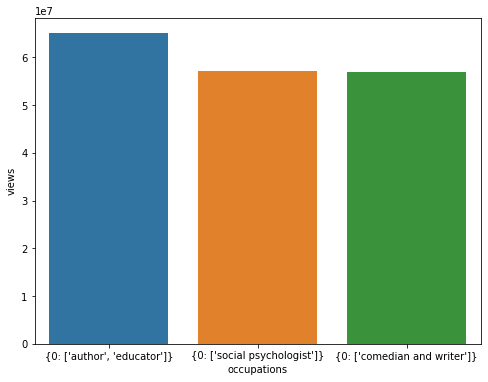

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='occupations',y='views',data=top_views_occupation.head(3))

The above data shows that the topmost views went to the speaker who was author or educator then followed by social psychologist and then comedian and writer.It appears that most viewers are interested in motivational and educational talks that focus mainly on self-improvement and happiness. 

#Lets visualise the different languages of the talk and its value counts

In [ ]:
no_of_talks=pd.DataFrame(df['native_lang'].value_counts()).rename(columns={'native_lang':'counts'})
no_of_talks

,counts
en,3957
es,27
fr,9
ja,3
hi,2
de,1
pt,1
ko,1
zh-cn,1
ar,1


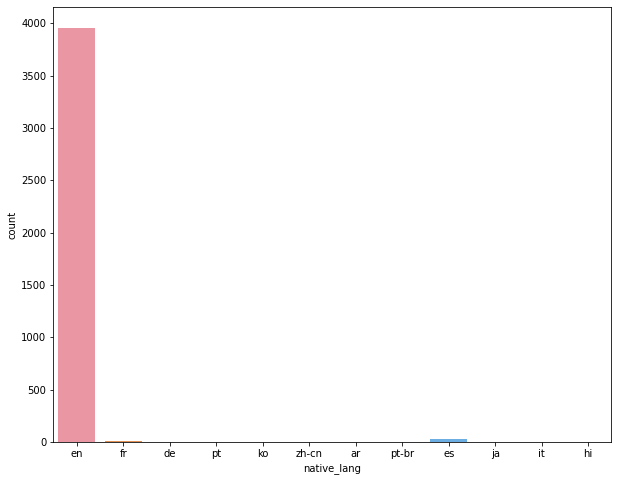

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.native_lang)

Almoost the talk has been delivered in english language.

#Lets visualise the topics of the talk which got the most views in descending order.

In [ ]:
top_views_topic1=df.sort_values(by='views',ascending=False)
top_views_topic=top_views_topic1.iloc[:,6:15:8]
top_views_topic

,views,topics
4,65051954,"['children', 'creativity', 'culture', 'dance',..."
1296,57074270,"['body language', 'brain', 'business', 'psycho..."
2062,56932551,"['comedy', 'curiosity', 'communication', 'humo..."
646,49730580,"['TEDx', 'business', 'entrepreneur', 'leadersh..."
796,47544833,"['TEDx', 'communication', 'culture', 'depressi..."
...,...,...
2813,0,"['environment', 'economics', 'biosphere', 'nat..."
3056,0,"['art', 'photography', 'community', 'history',..."
3068,0,"['global issues', 'science', 'insects', 'food'..."
3520,0,"['health', 'public health', 'animals', 'smell'..."


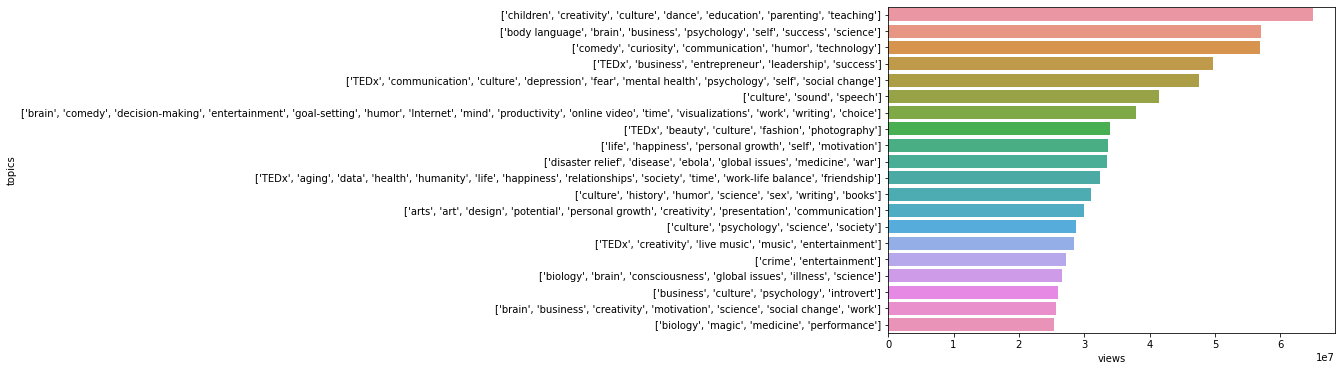

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='views',y='topics',data=top_views_topic.head(20))

#Which themes are most popular amongst TEDsters?

In [14]:
df['speaker_1'].unique

<bound method Series.unique of 0                    Al Gore
1               Hans Rosling
2                David Pogue
3              Majora Carter
4           Sir Ken Robinson
                ...         
4000            Nancy Lublin
4001     Stefan C Dombrowski
4002    Dick M. Carpenter II
4003       Daina Ramey Berry
4004            Cella Wright
Name: speaker_1, Length: 4005, dtype: object>

The given dataset has different speakers,no duplicated speaker found.

## Adding a daily views column for further analysis:

Formatting Datetime type:

In [20]:
# importing Datetime
from datetime import datetime
import calendar
# Setting the Datetime formate: 
today = datetime.now()
today.strftime('%Y-%m-%d')

'2022-11-22'

In [16]:
# Recorded date formate:
df['recorded_date']= pd.to_datetime(df['recorded_date'])
# Formating the published date time:
df['published_date']= pd.to_datetime(df['published_date'])

# Period of day's talk has been published:
last_publishing_date = df['published_date'].max()

df['time_since_published'] = last_publishing_date - pd.DatetimeIndex(df['published_date'])

In [17]:
df

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,time_since_published
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",5056 days
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",5056 days
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",5056 days
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,5056 days
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,5056 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",3 days
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",3 days
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studi

In [18]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [24]:
df['month'] = pd.DatetimeIndex(df['published_date']).month
df['month']

0       6
1       6
2       6
3       6
4       6
       ..
4000    4
4001    4
4002    4
4003    4
4004    4
Name: month, Length: 4005, dtype: int64

In [27]:
import datetime
df['month'] = pd.DatetimeIndex(df['published_date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['year'] = pd.DatetimeIndex(df['published_date']).year
df['day'] = pd.DatetimeIndex(df['published_date']).day
df['week_day']= df['published_date'].apply(lambda x: day_order[datetime.date(x.year, x.month, x.day).weekday()])


#Creating daily views column:

In [29]:
# Daily views/Talk:
df['daily_views'] = df['views'] / ( df['time_since_published'].apply(lambda x : x.days) + 1 )

#Categarising Variable types:

In [30]:
#data_categorical= df[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'comments', 'topics', 'related_talks', 'url', 'description', 'transcript']] data_numerical= df[['views', 'duration']]

#data_target_variable= df[['views']]

#Bivariate Analysis of different features vs. target variable:

Speaker_1 vs. daily_views:

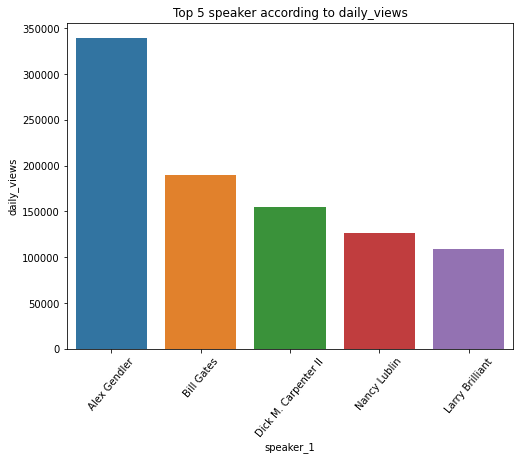

In [ ]:
#top 25 speakers
temp=df.groupby(['speaker_1'],as_index=False)['daily_views'].sum().sort_values('daily_views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1', y='daily_views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.title('Top 5 speaker according to daily_views')
ax.grid(False)

#speaker vs. talks delivered:

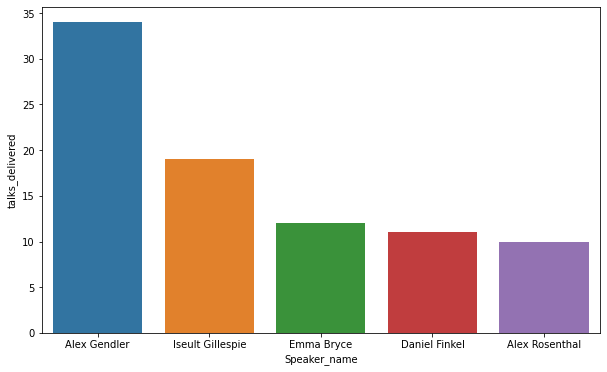

In [ ]:
# Speaker vs. talks delivered:
speaker_count = df['speaker_1'].value_counts().to_frame()
data_speaker_count = pd.DataFrame(speaker_count)
data_speaker_count = data_speaker_count.reset_index()
data_speaker_count.columns = ['Speaker_name', 'talks_delivered']
most_talks = data_speaker_count.nlargest(5, 'talks_delivered')
plt.figure(figsize=(10,6))
sns.barplot(x = 'Speaker_name', y = 'talks_delivered', data = most_talks)

#speaker vs. duration

Text(0.5, 1.0, 'Most popular speaker according to views')

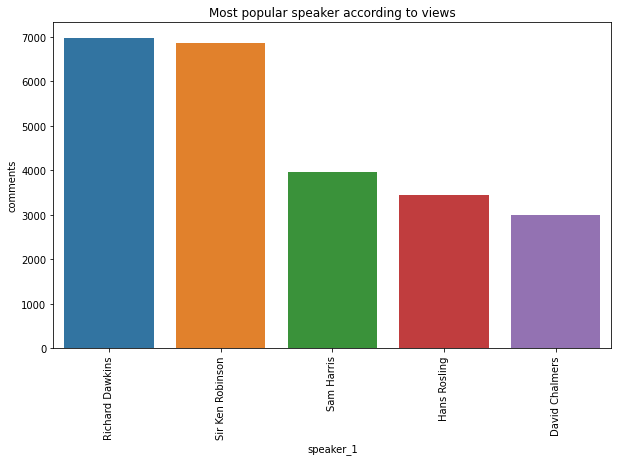

In [ ]:
temp=df.groupby(['speaker_1'],as_index=False)['comments'].sum().sort_values('comments',ascending=False)[:5]
plt.figure(figsize=(10,6))
ax=sns.barplot(x='speaker_1',y='comments',data=temp);
plt.setp(ax.get_xticklabels(), rotation=90);
plt.title('Most popular speaker according to views')

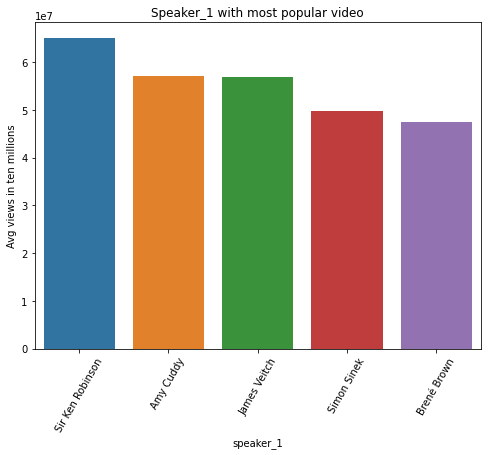

In [ ]:
# Speaker most popular video
temp=df[['speaker_1','views']].sort_values('views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1',y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=60);
plt.title('Speaker_1 with most popular video')
plt.ylabel('Avg views in ten millions')
ax.grid(False)

#Applying target encoding on speaker1


In [ ]:
speaker=df.groupby('speaker_1').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(speaker)

plot of speaker_1_avg_views:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


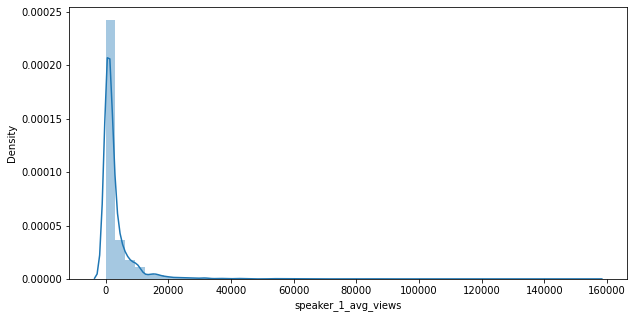

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

#Event


As event is also a categorical feature, we have done target encoding on it:

List item

List item

In [ ]:
event=df.groupby('event').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
event=event.to_dict()
event=event.values()
event=  list(event)[0]
df['event_wise_avg_views']=df['event'].map(event)

#Plot of event_wise_avg_views



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


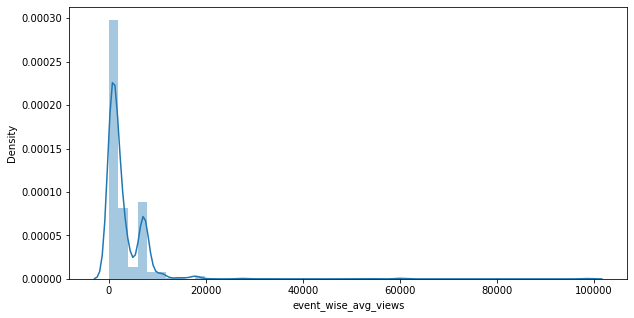

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['event_wise_avg_views'])

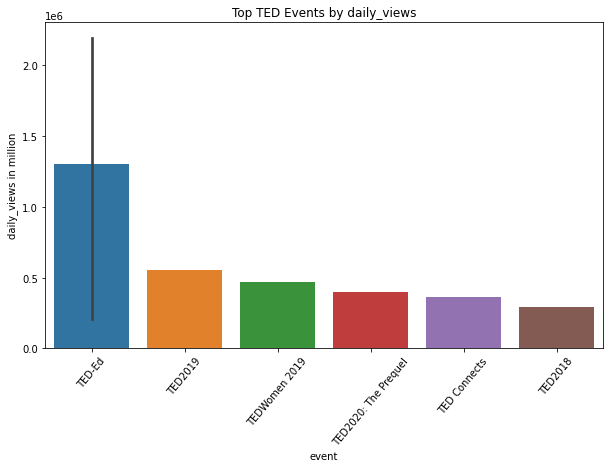

In [ ]:
temp=df.groupby(['event','year'],as_index=False).agg({'daily_views':'sum','talk_id':'count'}).sort_values('daily_views',ascending=False).reset_index()[:8]
temp['talk_id']=temp['daily_views']/temp['talk_id']
plt.figure(figsize=(10,6))
ax=sns.barplot(x='event',y='daily_views',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by daily_views')
plt.ylabel('daily_views in million')
plt.setp(labels, rotation=50);

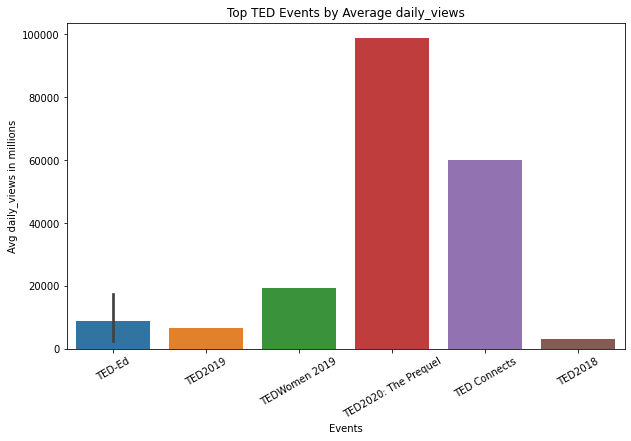

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='event',y='talk_id',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by Average daily_views')
plt.xlabel('Events')
plt.ylabel('Avg daily_views in millions')

plt.setp(labels, rotation=30);

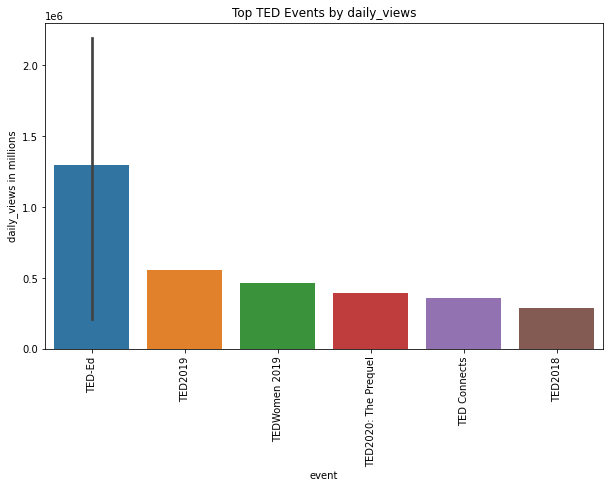

In [ ]:
temp=df.groupby(['event','year'],as_index=False).agg({'daily_views':'sum','talk_id':'count'}).sort_values('daily_views',ascending=False).reset_index()[:8]
plt.figure(figsize=(10,6))
ax=sns.barplot(x='event',y='daily_views',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by daily_views')
plt.ylabel('daily_views in millions')
plt.setp(labels, rotation=90);

#Density plot of available language column:

In [31]:
df['number_of_lang'] = df['available_lang'].apply(lambda x: len(x))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


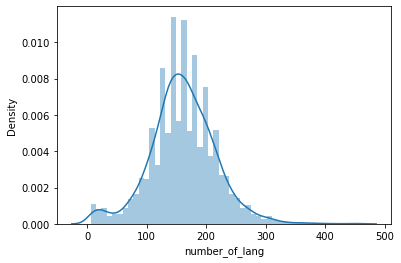

In [32]:
sns.distplot(df['number_of_lang'])

#Topics

In [ ]:
df['topics']

0       ['alternative energy', 'cars', 'climate change...
1       ['Africa', 'Asia', 'Google', 'demo', 'economic...
2       ['computers', 'entertainment', 'interface desi...
3       ['MacArthur grant', 'activism', 'business', 'c...
4       ['children', 'creativity', 'culture', 'dance',...
                              ...                        
4000    ['activism', 'data', 'technology', 'mental hea...
4001    ['TED-Ed', 'education', 'history', 'animation'...
4002    ['society', 'law', 'policy', 'justice system',...
4003    ['TED-Ed', 'education', 'animation', 'United S...
4004    ['animals', 'TED-Ed', 'animation', 'oceans', '...
Name: topics, Length: 4005, dtype: object

In [ ]:
df['num_of_topics'] = df.apply(lambda x: len(x['topics']), axis=1)

#Density plot of num of topics:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


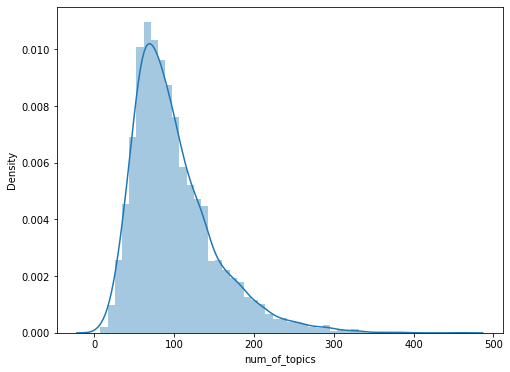

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['num_of_topics'])

#Unique topics:

In [ ]:
#Checking for unique topic
unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)
      
len(unique_topics)

57

In [ ]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['daily_views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [ ]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values

#Density plot for topic_wise_views:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


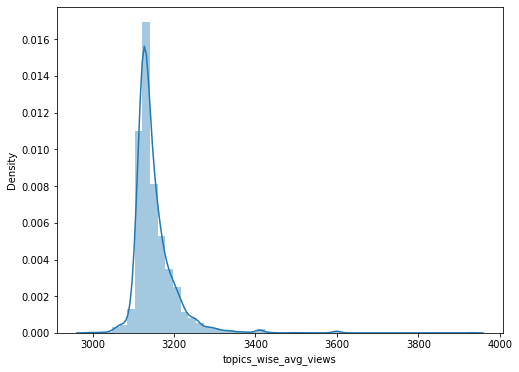

In [ ]:
# Graph:
plt.figure(figsize=(8,6))
sns.distplot(df['topics_wise_avg_views'])

#related_talks column.

In [ ]:
#applying eval function related talk column:
import ast
df['related_talks'] = df['related_talks'].apply(lambda x: ast.literal_eval(x))

#Related Talk

Related talk column contains a dictionary containing information about related videos with talk_id as key and video name as it's value.** ** taking mean of all realated talk videos views:

In [ ]:
#defining a new feature called related_views
df['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(df)):
      if (df.loc[i,'talk_id']) in id_list:
        temp+=df.loc[i,'daily_views']

    df.loc[index,'related_views']=temp//6

KeyboardInterrupt: ignored

#Density plot of realted_views:

In [ ]:
#Graph of related_views column
plt.figure(figsize=(10,5))
sns.distplot(df['related_views'])

#Outlier Treatment on numerical columns.

We are replacing the outliers with the mean values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


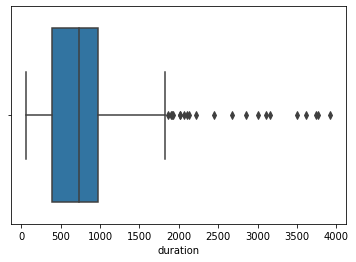

In [ ]:
# Aplying Outlier treatment on duration and number of Languages:

sns.boxplot(df['duration'],data=df)

In [ ]:
data_duration_iqr=  df['duration'].quantile(0.75)-df['duration'].quantile(0.25)
df['duration']= df['duration'].mask(df['duration']>(df['duration'].quantile(0.75)+1.5*data_duration_iqr), df['duration'].mean())


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


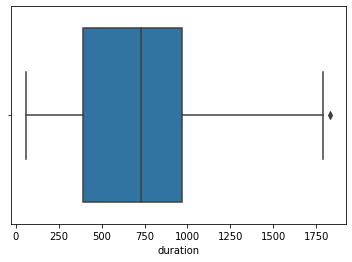

In [ ]:
sns.boxplot(df['duration'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


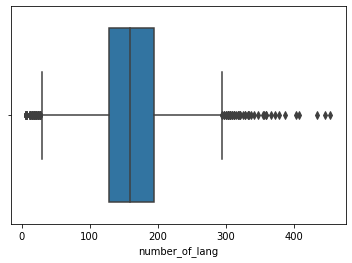

In [ ]:
sns.boxplot(df['number_of_lang'],data=df)

In [ ]:
number_of_lang_iqr= (df['number_of_lang'].quantile(0.75))-(df['number_of_lang'].quantile(0.25))
df['number_of_lang']= df['number_of_lang'].mask(df['number_of_lang']>(df['number_of_lang'].quantile(0.75)+1.5*number_of_lang_iqr), df['number_of_lang'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


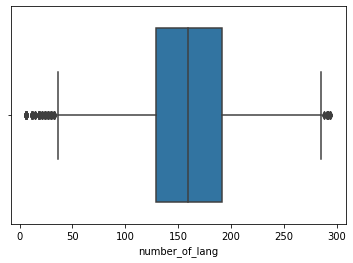

In [ ]:
sns.boxplot(df['number_of_lang'],data=df)

In [ ]:
df['number_of_lang']= df['number_of_lang'].mask(df['number_of_lang']<(df['number_of_lang'].quantile(0.25)-1.5*number_of_lang_iqr), df['number_of_lang'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


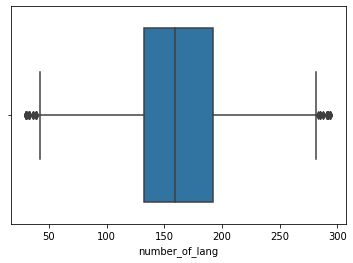

In [ ]:
sns.boxplot(df['number_of_lang'],data=df)

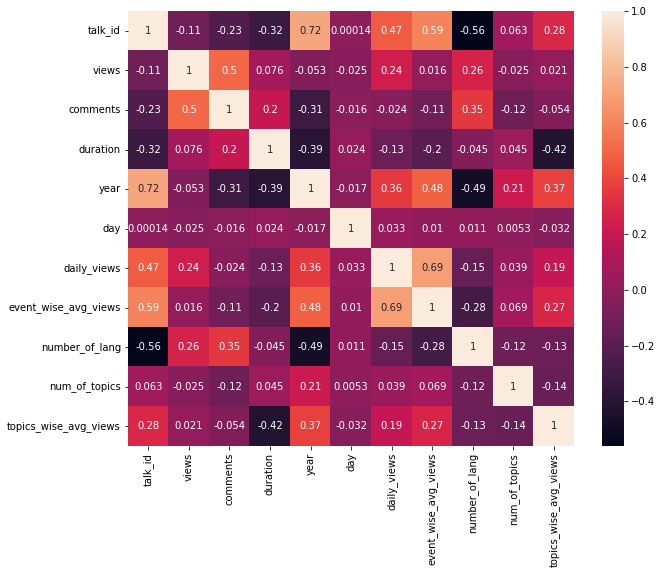

In [ ]:
#checking collinearity
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

#Removing Irrelevant columns:

In [ ]:
unwanted_features=['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'topics',
       'related_talks', 'url', 'description', 'transcript',
     'topics_wise_avg_views']

In [ ]:
#dropping unimportant columns from the datasets.
df.drop(columns=unwanted_features,inplace=True)

In [ ]:
df=df.replace(np.nan,0)

In [ ]:
df.drop(['time_since_published'],axis=1,inplace=True)

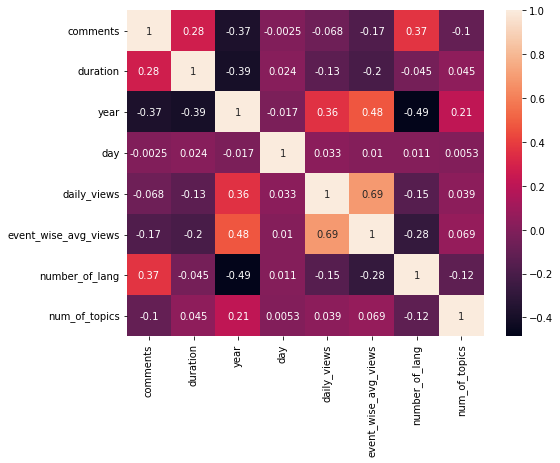

In [ ]:
#checking collinearity
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

#Defining the dependent and independent variables.




In [ ]:
#separating the dependent and independent variables
y=df['daily_views']
x=df.drop(columns='daily_views')

In [ ]:
y.values

In [ ]:
x.values

In [ ]:
x

,comments,duration,num_of_topics,month,year,day,week_day,speaker_1_avg_views,event_wise_avg_views,number_of_lang,related_views
0,272.0,977.0,134,Jun,2006,27,Tue,699.725014,782.728890,270.000000,3093
1,628.0,1190.0,138,Jun,2006,27,Tue,1098.925286,782.728890,160.720599,865
2,124.0,1286.0,123,Jun,2006,27,Tue,687.917181,782.728890,165.000000,1528
3,219.0,1116.0,116,Jun,2006,27,Tue,452.806229,782.728890,219.000000,799
4,4931.0,1164.0,84,Jun,2006,27,Tue,6453.203121,782.728890,160.720599,2524
...,...,...,...,...,...,...,...,...,...,...,...
4000,6.0,690.0,93,Apr,2020,27,Mon,42233.627029,98747.783730,158.449236,0
4001,0.0,346.0,97,Apr,2020,27,Mon,76796.750000,7240.324824,158.449236,0
4002,9.0,774.0,54,Apr,2020,28,Tue,154804.666667,10962.868967,158.449236,0
4003,0.0,257.0,161,Apr,2020,30,Thu,56582.000000,7240.324824,158.449236,0


#Doing one hot encoding using get_dummies function.

In [ ]:
#one hot encoding on categorical features
x=pd.get_dummies(x)
x.shape

(4005, 26)

In [ ]:
#creating the array of independent variable
x=x.values


In [ ]:
x

,comments,duration,num_of_topics,year,day,speaker_1_avg_views,event_wise_avg_views,number_of_lang,related_views,month_Apr,...,month_Nov,month_Oct,month_Sep,week_day_Fri,week_day_Mon,week_day_Sat,week_day_Sun,week_day_Thu,week_day_Tue,week_day_Wed
0,272.0,977.0,134,2006,27,699.725014,782.728890,270.000000,3093,0,...,0,0,0,0,0,0,0,0,1,0
1,628.0,1190.0,138,2006,27,1098.925286,782.728890,160.720599,865,0,...,0,0,0,0,0,0,0,0,1,0
2,124.0,1286.0,123,2006,27,687.917181,782.728890,165.000000,1528,0,...,0,0,0,0,0,0,0,0,1,0
3,219.0,1116.0,116,2006,27,452.806229,782.728890,219.000000,799,0,...,0,0,0,0,0,0,0,0,1,0
4,4931.0,1164.0,84,2006,27,6453.203121,782.728890,160.720599,2524,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,6.0,690.0,93,2020,27,42233.627029,98747.783730,158.449236,0,1,...,0,0,0,0,1,0,0,0,0,0
4001,0.0,346.0,97,2020,27,76796.750000,7240.324824,158.449236,0,1,...,0,0,0,0,1,0,0,0,0,0
4002,9.0,774.0,54,2020,28,154804.666667,10962.868967,158.449236,0,1,...,0,0,0,0,0,0,0,0,1,0
4003,0.0,257.0,161,2020,30,56582.000000,7240.324824,158.449236,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
x_train.shape

(2803, 28)

In [ ]:
x_test.shape

(1202, 28)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)

In [ ]:
r2_score(y_test, y_test_pred)

0.8293605444841214

In [ ]:
r2_score(y_train, y_train_pred)

0.7528239257572826

#Evaluation Metrics

In [ ]:
from numpy import math

In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  

In [ ]:
# Training dataset metrics
print_metrics(y_train, y_train_pred)

MSE is 14106608.72821187
RMSE is 3755.8765592351238
RMSE is 0.7528239257572826
MAE is 1237.0240155676581
MAPE is inf


In [ ]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 8942877.122877667
RMSE is 2990.4643657595498
RMSE is 0.8293605444841214
MAE is 1195.0153404994978
MAPE is 188.49873115144536


In [ ]:
# Adjusted R2

def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))

In [ ]:
adjusted_r2(len(y_train),len(x), y_train, y_train_pred)

2.282672777298999

In [ ]:
adjusted_r2(len(y_test),len(x), y_test, y_test_pred)

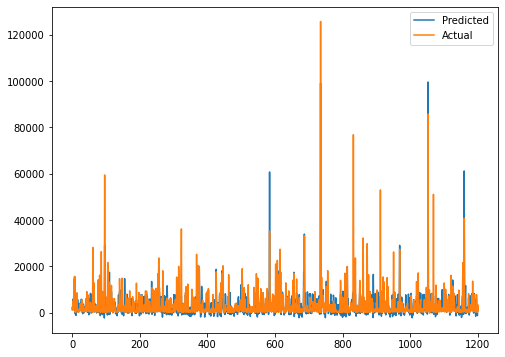

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(y_test_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

#Regularized linear regression and cross validation

In [ ]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.062e+10, tolerance: 1.186e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.085e+10, tolerance: 6.821e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -32912019.291003287


In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 :" ,r2)

MSE : 20880106.726031132
RMSE : 4569.475541682123
R2 : 0.6015857096226229


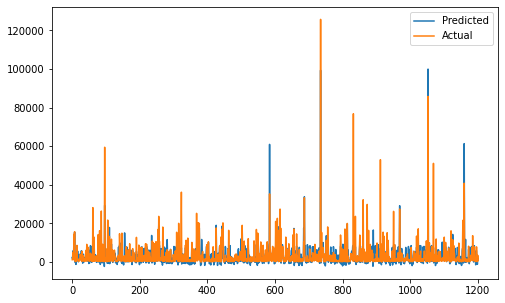

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
r2 = r2_score(y_test, y_pred_lasso)
r2

0.6015857096226229

#Running Grid Search Cross Validation for Ridge Regression

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -32912019.291003305


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 :" ,r2)

MSE : 20880106.72603111
RMSE : 4569.475541682121
R2 : 0.6015857096226233


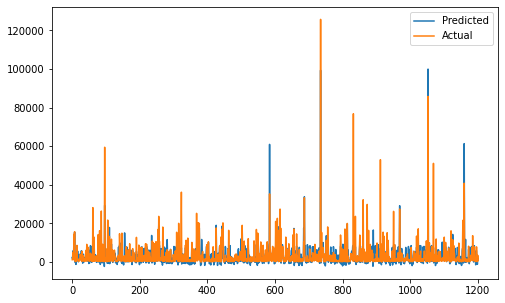

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

Conclusion

That's it! We reached the end of our exercise.

Started with loading the data so far we have done EDA ,feature engineering , data cleaning, target encoding and one hot encoding of categorical columns, feature selection and then model building.


So far we have modelled on

1.LinearRegression

2.Lasso Regressor

3.Ridge Regressor


In all of these models our errors have been in the range of 2,00,000 which is around 10% of the average views. We have been able to correctly predict views 90% of the time.
After hyper parameter tuning, we have prevented overfitting and decreased errors by regularizing and reducing learning rate.
Given that only have 10% errors, our models have performed very well on unseen data due to various factors like feature selection,correct model selection,etc.

In all the features speaker_wise_avg_views is most important this implies that speakers are directly impacting the views.